In [2]:
from IPython.display import Image, display
import cv2

In [3]:
def img_show(image, width=400):
    _, buffer = cv2.imencode('.jpg', image)
    display(Image(data=buffer, width=width))

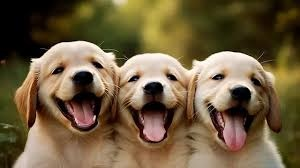

In [4]:
import mediapipe as mp
import cv2

image1 = mp.Image.create_from_file('../data/dog.jpg')
image = image1.numpy_view()
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  
img_show(image)

In [8]:
from mediapipe.tasks import python
from mediapipe.tasks.python import vision

base_options = python.BaseOptions(model_asset_path='../data/effi.tflite')
options = vision.ImageClassifierOptions(base_options=base_options, max_results=4)
classifier = vision.ImageClassifier.create_from_options(options)

I0000 00:00:1732165648.696204   39340 gl_context_egl.cc:85] Successfully initialized EGL. Major : 1 Minor: 5
I0000 00:00:1732165648.696912   40604 gl_context.cc:357] GL version: 3.2 (OpenGL ES 3.2 Mesa 23.2.1-1ubuntu3.1~22.04.2), renderer: Mesa Intel(R) Xe Graphics (TGL GT2)
INFO: Created TensorFlow Lite XNNPACK delegate for CPU.
W0000 00:00:1732165648.707550   40606 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


In [9]:
classification_result = classifier.classify(image1)
classification_result

ClassificationResult(classifications=[Classifications(categories=[Category(index=207, score=0.375, display_name='', category_name='golden retriever'), Category(index=208, score=0.1640625, display_name='', category_name='Labrador retriever'), Category(index=175, score=0.078125, display_name='', category_name='otterhound'), Category(index=194, score=0.05078125, display_name='', category_name='Dandie Dinmont')], head_index=0, head_name='probability')], timestamp_ms=0)

In [10]:
classification_result.classifications[0].categories[0].category_name

'golden retriever'

In [14]:
for idx, category in enumerate(classification_result.classifications[0].categories):
    text = f"{category.category_name}: {category.score:.2f}"
    print(text)

golden retriever: 0.38
Labrador retriever: 0.16
otterhound: 0.08
Dandie Dinmont: 0.05


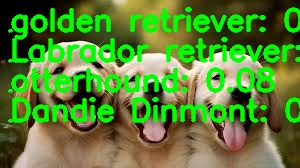

In [24]:
for idx, category in enumerate(classification_result.classifications[0].categories):
    text = f"{category.category_name}: {category.score:.2f}"
    position = (10, 30 + idx * 30)
    cv2.putText(image, text, position, cv2.FONT_HERSHEY_SIMPLEX,
                1, (0,255,0), 2, cv2.LINE_AA)
    
img_show(image)

In [26]:
from IPython.display import Image, display, clear_output
import cv2

def video_show(frame, width=400):
    _, buffer = cv2.imencode('.jpg', frame)
    clear_output(wait=True)
    display(Image(data=buffer, width=width))

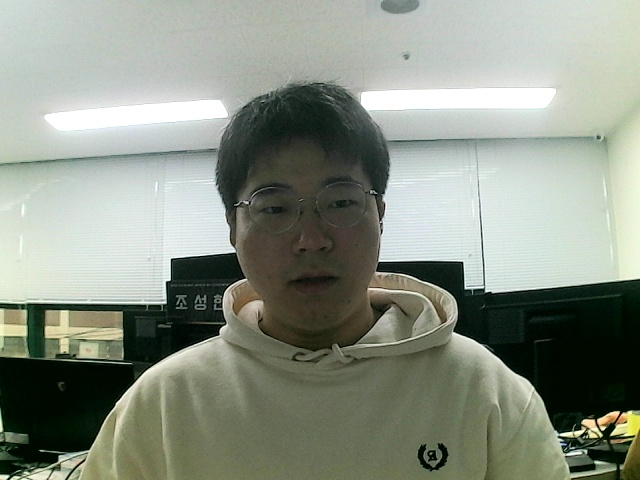

In [28]:
import time

cap = cv2.VideoCapture(0)
fps = cap.get(cv2.CAP_PROP_FPS)
start_time = time.time()

while time.time() - start_time < 3:
    _, frame = cap.read()
    video_show(frame)
    time.sleep(1/fps)

cap.release()

In [29]:
import time

def video_play(video_path, duration=3, width=300):
    cap = cv2.VideoCapture(video_path)
    fps = cap.get(cv2.CAP_PROP_FPS)
    start_time = time.time()

    while time.time() - start_time < duration:
        _, frame = cap.read()
        video_show(frame, width=width)
        time.sleep(1/fps)

    cap.release()


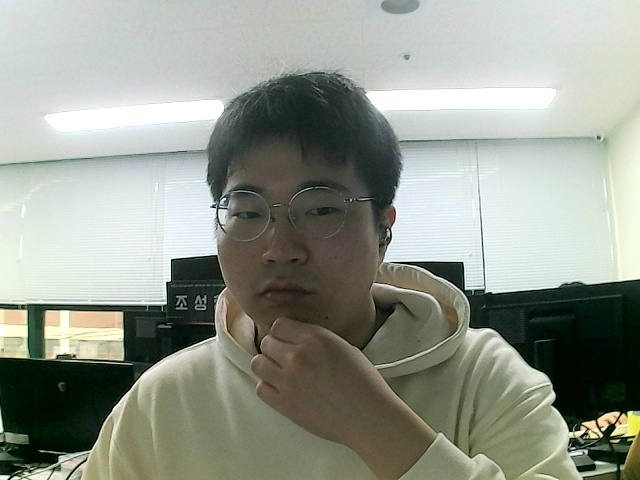

In [30]:
video_play(0)

In [36]:
def extract_landmarks_from_image(image):
    mp_pose = mp.solutions.pose
    pose = mp_pose.Pose(static_image_mode=True, min_detection_confidence=0.5)

    results = pose.process(image)

    return results

In [37]:
image_raw = cv2.imread('../data/test_man_image.jpg')
image = cv2.cvtColor(image_raw, cv2.COLOR_BGR2RGB)
results = extract_landmarks_from_image(image)
print(results)

<class 'mediapipe.python.solution_base.SolutionOutputs'>


I0000 00:00:1732168516.185776   39340 gl_context_egl.cc:85] Successfully initialized EGL. Major : 1 Minor: 5
I0000 00:00:1732168516.186953   43169 gl_context.cc:357] GL version: 3.2 (OpenGL ES 3.2 Mesa 23.2.1-1ubuntu3.1~22.04.2), renderer: Mesa Intel(R) Xe Graphics (TGL GT2)
W0000 00:00:1732168516.268504   43163 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732168516.315865   43159 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732168516.340444   43164 landmark_projection_calculator.cc:186] Using NORM_RECT without IMAGE_DIMENSIONS is only supported for the square ROI. Provide IMAGE_DIMENSIONS or use PROJECTION_MATRIX.


In [38]:
results.pose_landmarks

landmark {
  x: 0.521245837
  y: 0.176638544
  z: -0.590059102
  visibility: 0.999997139
}
landmark {
  x: 0.534405649
  y: 0.159563452
  z: -0.567554533
  visibility: 0.999993205
}
landmark {
  x: 0.54088
  y: 0.159408987
  z: -0.567694128
  visibility: 0.999991417
}
landmark {
  x: 0.54709971
  y: 0.15894863
  z: -0.567824423
  visibility: 0.999990821
}
landmark {
  x: 0.511880934
  y: 0.159314
  z: -0.553091
  visibility: 0.999994278
}
landmark {
  x: 0.504726946
  y: 0.158874959
  z: -0.55309236
  visibility: 0.999992132
}
landmark {
  x: 0.49826932
  y: 0.158648878
  z: -0.553108096
  visibility: 0.999992609
}
landmark {
  x: 0.560601
  y: 0.164051473
  z: -0.382087737
  visibility: 0.999996305
}
landmark {
  x: 0.495123357
  y: 0.165335476
  z: -0.314914256
  visibility: 0.999991059
}
landmark {
  x: 0.53640157
  y: 0.196699262
  z: -0.516232073
  visibility: 0.999998569
}
landmark {
  x: 0.508623421
  y: 0.197369099
  z: -0.497628182
  visibility: 0.999998212
}
landmark {
  x: 0

In [39]:
len(results.pose_landmarks.landmark)

33

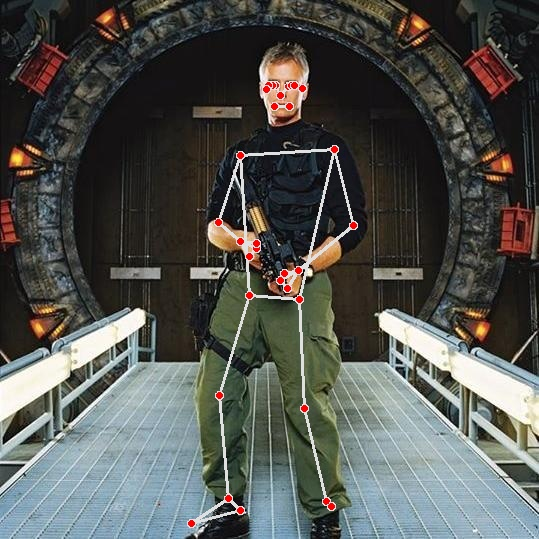

In [40]:
mp_pose = mp.solutions.pose 
mp.drawing = mp.solutions.drawing_utils
mp.drawing.draw_landmarks(image_raw, results.pose_landmarks, mp_pose.POSE_CONNECTIONS)

img_show(image_raw, width=700)

In [44]:
def video_pose_estimation(video_path, duration=10, width=600):
    mp_pose = mp.solutions.pose 
    mp_drawing = mp.solutions.drawing_utils
    
    cap = cv2.VideoCapture(video_path)
    pose = mp_pose.Pose(static_image_mode=False, min_detection_confidence=0.5, min_tracking_confidence=0.5)

    start_time = time.time()

    while time.time() - start_time < duration:
        _, frame = cap.read()
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        results = pose.process(image)
        image = cv2.cvtColor(image,cv2.COLOR_RGB2BGR)
        mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS)
        video_show(image, width=width)
        time.sleep(0.03)

    cap.release()

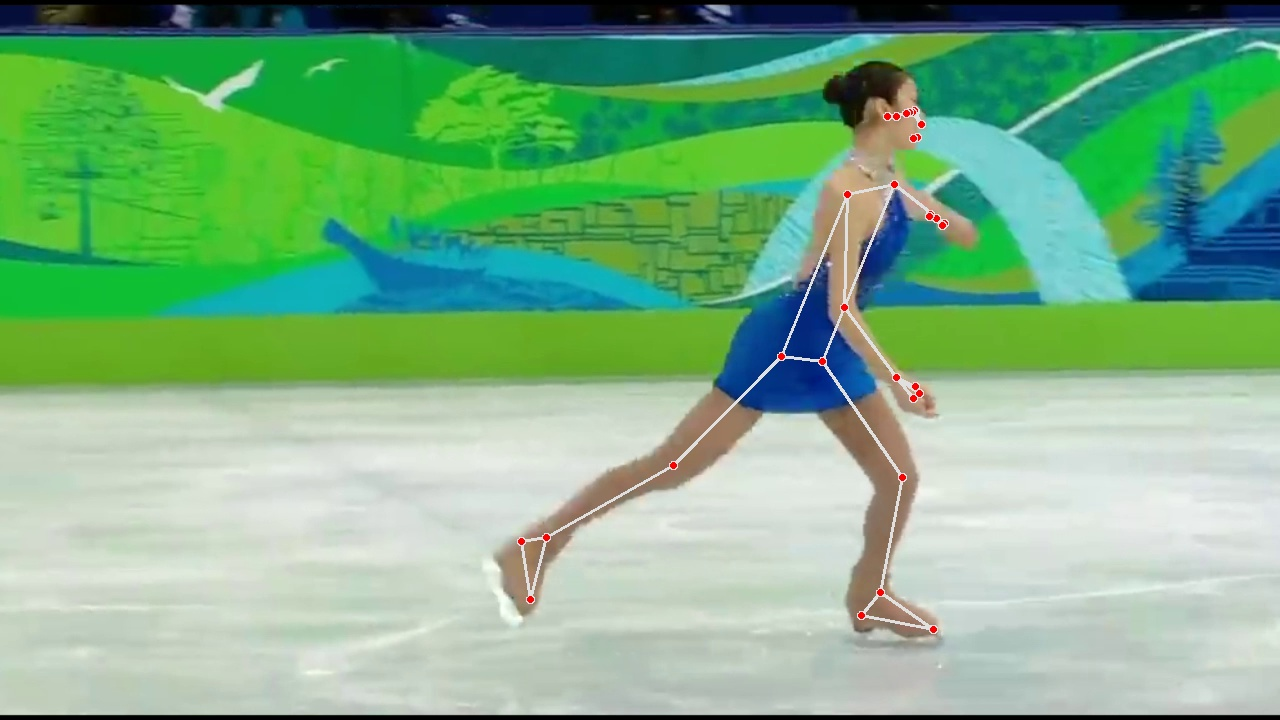

In [45]:
video_pose_estimation("../data/yuna_queen.mp4")